# CREDIT CARD FRAUD DETECTION 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# loading data to a pandas DataFrame
credit_card_data = pd.read_csv(r"C:\Users\umesh\Downloads\archive (3)\creditcard.csv")

In [9]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [15]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [27]:
#0 --> Normal Transaction

#1 --> fraudulent transaction

In [29]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [31]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [33]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [35]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [39]:
#Under-Sampling

#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#Number of Fraudulent Transactions --> 492

In [41]:
legit_sample = legit.sample(n=492)

In [43]:
#Concatenating two DataFrames

In [45]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [47]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159323,112404.0,2.024725,-0.186510,-1.436981,0.087039,0.136186,-0.578342,-0.045942,-0.045689,0.698667,...,0.309499,0.941645,0.031329,0.690176,0.252739,-0.465188,-0.006110,-0.060091,1.00,0
60575,49387.0,-0.575923,0.943270,1.661897,0.895276,-0.131726,-0.283204,0.862364,-0.016082,-0.241056,...,0.022918,0.211239,-0.118050,0.601600,0.111763,-0.397652,-0.030341,0.051658,40.47,0
73977,55372.0,-0.336582,0.117980,2.125372,-0.568722,-0.679713,0.328554,0.107007,0.104949,0.832845,...,-0.187299,-0.283408,-0.112693,0.044542,-0.368783,0.869265,-0.305260,-0.230999,40.00,0
169213,119581.0,1.915838,-1.491317,-0.706994,-0.839778,-1.265238,-0.354304,-1.027380,0.053146,0.092275,...,0.408565,0.904433,-0.002465,-0.329397,-0.227012,-0.095360,-0.024656,-0.043865,129.00,0
75762,56239.0,1.024398,-0.661291,1.148644,0.177486,-1.184112,0.285448,-0.836390,0.371272,1.071767,...,-0.125558,-0.252382,0.095276,0.286362,-0.043268,0.940335,-0.035630,0.008528,53.02,0


In [49]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [51]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [53]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94583.286585,-0.000065,-0.134693,0.027790,-0.009229,-0.019301,0.031149,0.005979,0.035047,-0.021071,...,-0.009082,0.013132,-0.024803,0.028237,-0.007291,-0.019067,0.012278,-0.002878,0.006864,101.165224
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [55]:
# Splitting the data into Features & Targets

In [57]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [61]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
159323  112404.0  2.024725 -0.186510 -1.436981  0.087039  0.136186 -0.578342   
60575    49387.0 -0.575923  0.943270  1.661897  0.895276 -0.131726 -0.283204   
73977    55372.0 -0.336582  0.117980  2.125372 -0.568722 -0.679713  0.328554   
169213  119581.0  1.915838 -1.491317 -0.706994 -0.839778 -1.265238 -0.354304   
75762    56239.0  1.024398 -0.661291  1.148644  0.177486 -1.184112  0.285448   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [63]:
print(Y)

159323    0
60575     0
73977     0
169213    0
75762     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [65]:
# Split the data into Training data & testing

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [71]:
# Model Training

#Logistic Regression

In [75]:
model = LogisticRegression()

In [102]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [104]:
#Model Evaluation

#Accuracy Score

In [106]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [108]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [110]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [112]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.949238578680203


# EDA

Text(0.5, 1.0, 'Percentage of fraud transections')

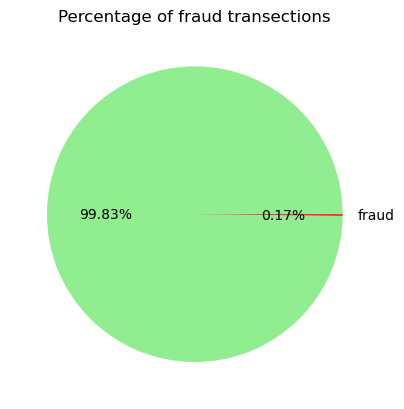

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
credit_card_data = pd.read_csv(r"C:\Users\umesh\Downloads\archive (3)\creditcard.csv")
credit_card_data['Class'].value_counts().plot.pie(autopct='%.2f%%',
                                                 colors=['lightgreen','red'],
                                                 labels=['', 'fraud'])
plt.ylabel('')
plt.title('Percentage of fraud transections')

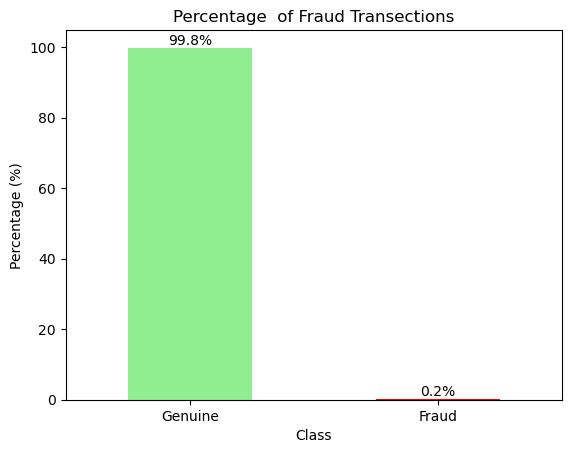

In [19]:
# Assuming credit_card_data is your DataFrame
counts = credit_card_data['Class'].value_counts()
percentages = counts / counts.sum() * 100 # percentage calculate

# Plotting
ax = percentages.plot(kind='bar', color=['lightgreen', 'red'])
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage  of Fraud Transections')

# Adding percentage Labels on top of the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height():.1f}%',
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'bottom')
plt.xticks(ticks=range(len(percentages)), labels=['Genuine', 'Fraud'], rotation=0)
plt.show()

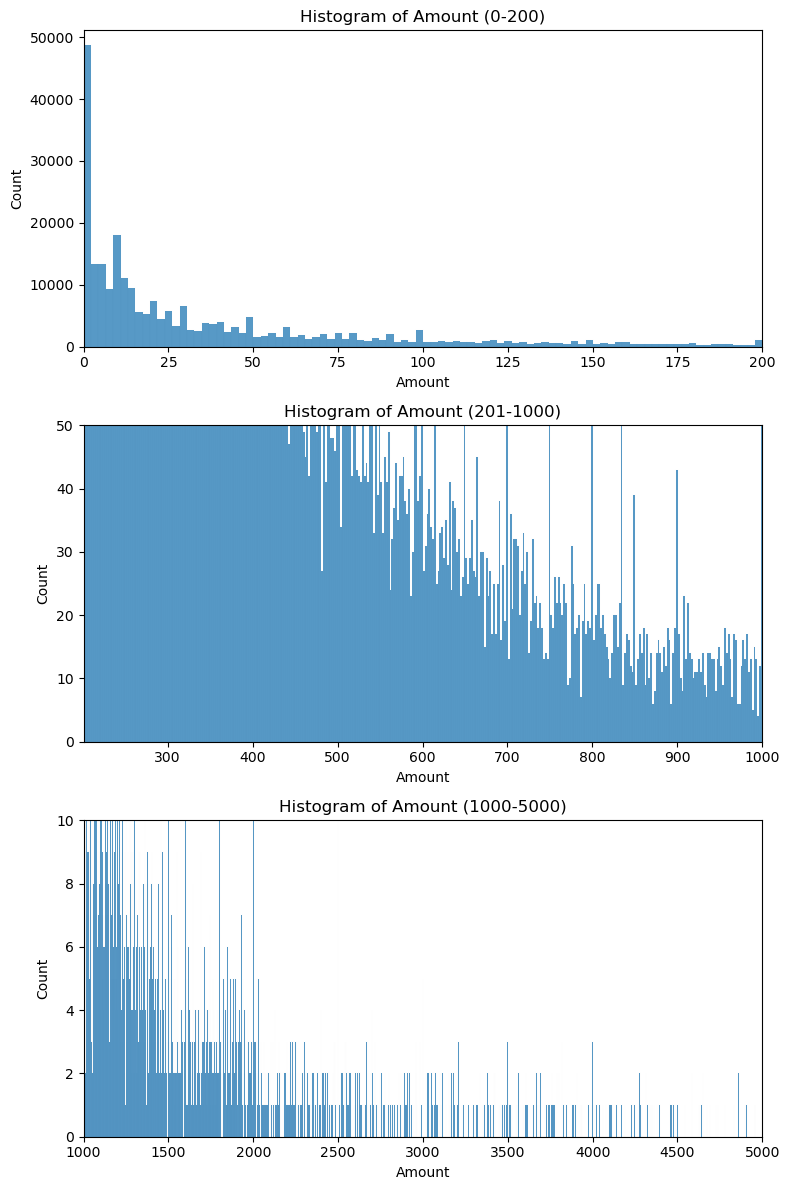

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3x1 subplot grid
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Histogram for the range 0-200
sns.histplot(credit_card_data['Amount'], ax=ax[0])
ax[0].set_xlim(0, 200)
ax[0].set_title('Histogram of Amount (0-200)')

# Histogram for the range 201-1000
sns.histplot(credit_card_data['Amount'], ax=ax[1])
ax[1].set_xlim(201, 1000)
ax[1].set_ylim(0, 50)
ax[1].set_title('Histogram of Amount (201-1000)')

# Histogram for the range 1000-5000
sns.histplot(credit_card_data['Amount'], ax=ax[2])
ax[2].set_xlim(1000, 5000)
ax[2].set_ylim(0, 10)
ax[2].set_title('Histogram of Amount (1000-5000)')

# Adjust layout
plt.tight_layout()
plt.show()

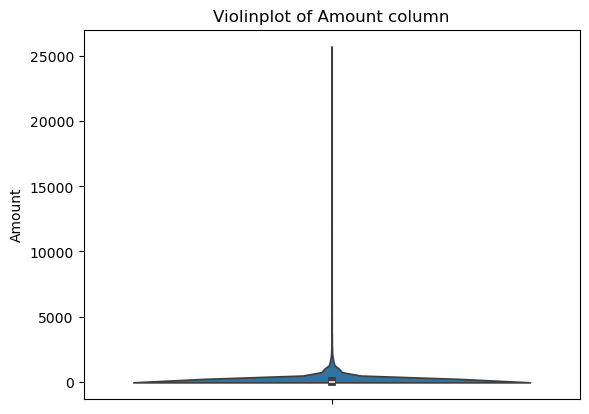

In [35]:
sns.violinplot(credit_card_data['Amount'])
plt.title('Violinplot of Amount column')
plt.show()

In [ ]:
sns.heatmap(credit_card_data.select_dtypes('number').corr())
plt.title('Correlation b/w features')